In [1]:
from gerrychain import Graph

In [2]:
# Read Maine county graph from the json file "county23.json"
filename = 'ME_county.json'

# GerryChain has a built-in function for reading graphs of this type:
G = Graph.from_json( filename )

In [3]:
# Let's impose a 1% population deviation (+/- 0.5%)
deviation = 0.01

import math
k = 2          # number of districts
total_population = sum(G.nodes[node]['TOTPOP'] for node in G.nodes)

L = math.ceil((1-deviation/2)*total_population/k)
U = math.floor((1+deviation/2)*total_population/k)
print("Using L =",L,"and U =",U,"and k =",k)

Using L = 660860 and U = 667501 and k = 2


In [4]:
# A nice ordering of Maine's vertices (counties)
ordering = [12, 6, 11, 0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 15]

In [5]:
# finds vertices reachable from j in G[S]
def reachable(G, j, S):
    
    if j not in S:
        return list()
    
    child = [ j ]
    R = [ j ]
    
    while child:
        parent = child
        child = list()
        for u in parent:
            for v in G.neighbors(u):
                if v in S and v not in R:
                    child.append(v)
                    R.append(v)
    return R 

In [6]:
import copy

# Enumerate districts in G[S] that contain F. 
#   Assumes G[F] is connected 
def enumerate_districts(G,L,U,S,F,all_districts,added):
    
    pF = sum(G.nodes[i]['TOTPOP'] for i in F)
    pS = sum(G.nodes[i]['TOTPOP'] for i in S)
    
    # population exceeds what is allowed, or cannot reach what is required
    if pF > U or pS < L:   
        return
    
    # population in [L,U] and first time seeing F
    if pF >= L and added:   
        #print("District with population =",pF,"is",F)
        all_districts.append(F)
                
        
    # pick a vertex b that belongs to N(F) and S *and has largest population*
    b = None
    for f in F:
        for v in G.neighbors(f):
            if v not in F and v in S:
                if b == None:
                    b = v
                elif G.nodes[v]['TOTPOP'] > G.nodes[b]['TOTPOP']:
                    b = v
                  
    # no vertex b available to add
    if b is None:
        return
        
    # branch on vertex b
    
    # add b
    F_left = copy.deepcopy(F) + [b]
    S_left = copy.deepcopy(S)
    enumerate_districts(G,L,U,S_left,F_left,all_districts,True)

    # drop b
    F_right = copy.deepcopy(F)
    S_right = [i for i in S if i != b]
    enumerate_districts(G,L,U,S_right,F_right,all_districts,False)

In [7]:
n = len(ordering)
all_districts = list()

for p in range(n):
    
    j = ordering[p]
    V_j = ordering[slice(p,n,1)]
    S_j = reachable(G,j,V_j)
    districts_rooted_at_j = list()
    
    enumerate_districts(G,L,U,S_j,[j],districts_rooted_at_j,True)
    
    all_districts += districts_rooted_at_j
    
print(all_districts)

[[12, 14, 13, 6, 7, 3], [12, 14, 13, 5, 2, 4], [12, 14, 13, 5, 11, 8, 4], [12, 14, 6, 11, 8, 10, 7, 5, 15], [12, 14, 6, 11, 8, 7, 3, 5], [12, 14, 6, 11, 4, 5, 7, 10, 15], [12, 14, 6, 4, 5, 7, 3, 10], [12, 14, 11, 8, 10, 3, 7, 5, 15], [12, 14, 11, 8, 10, 7, 5, 2], [12, 14, 11, 8, 4, 5, 2, 1, 15], [12, 14, 11, 4, 5, 0], [12, 14, 11, 4, 5, 2, 1, 3], [12, 14, 4, 5, 0, 7], [12, 13, 6, 9, 5, 2, 7, 15], [12, 13, 6, 9, 5, 2, 11, 15], [12, 13, 6, 9, 5, 2, 8, 15], [12, 13, 6, 9, 5, 7, 3, 11], [12, 13, 6, 9, 5, 7, 3, 8], [12, 13, 6, 9, 5, 7, 3, 1], [12, 13, 6, 9, 5, 7, 3, 4], [12, 13, 6, 9, 5, 7, 10, 4, 15], [12, 13, 6, 9, 5, 7, 11, 8, 15], [12, 13, 6, 9, 5, 11, 8, 10, 15], [12, 13, 6, 9, 5, 8, 10, 3], [12, 13, 6, 9, 7, 10, 11, 8, 4], [12, 13, 6, 5, 0, 2, 7, 10, 15], [12, 13, 6, 5, 0, 2, 11, 8, 4], [12, 13, 6, 5, 0, 2, 11, 1, 4], [12, 13, 6, 5, 0, 2, 8, 1, 4], [12, 13, 6, 5, 0, 3, 10, 7, 11], [12, 13, 6, 5, 0, 3, 10, 7, 8], [12, 13, 6, 5, 0, 3, 11, 8, 4, 15], [12, 13, 6, 5, 0, 3, 11, 1, 4, 15], [

In [8]:
# Let's draw them on a map
import geopandas as gpd

In [9]:
# Read Maine county shapefile from "ME_county.shp"
filename = 'ME_county.shp'

# Read geopandas dataframe from file
df = gpd.read_file( filename )

District with population 662564 is [12, 14, 13, 6, 7, 3]
District with population 666393 is [12, 14, 13, 5, 2, 4]
District with population 664273 is [12, 14, 13, 5, 11, 8, 4]
District with population 665244 is [12, 14, 6, 11, 8, 10, 7, 5, 15]
District with population 662391 is [12, 14, 6, 11, 8, 7, 3, 5]
District with population 661555 is [12, 14, 6, 11, 4, 5, 7, 10, 15]
District with population 663145 is [12, 14, 6, 4, 5, 7, 3, 10]
District with population 661829 is [12, 14, 11, 8, 10, 3, 7, 5, 15]
District with population 661746 is [12, 14, 11, 8, 10, 7, 5, 2]
District with population 664383 is [12, 14, 11, 8, 4, 5, 2, 1, 15]
District with population 661588 is [12, 14, 11, 4, 5, 0]
District with population 666809 is [12, 14, 11, 4, 5, 2, 1, 3]
District with population 665081 is [12, 14, 4, 5, 0, 7]
District with population 665236 is [12, 13, 6, 9, 5, 2, 7, 15]
District with population 661743 is [12, 13, 6, 9, 5, 2, 11, 15]
District with population 660907 is [12, 13, 6, 9, 5, 2, 8, 15

C:\Users\buchanan\Anaconda3\lib\site-packages\geopandas\plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


District with population 663116 is [12, 13, 6, 9, 5, 7, 11, 8, 15]
District with population 664066 is [12, 13, 6, 9, 5, 11, 8, 10, 15]
District with population 665656 is [12, 13, 6, 9, 5, 8, 10, 3]
District with population 663857 is [12, 13, 6, 9, 7, 10, 11, 8, 4]
District with population 661764 is [12, 13, 6, 5, 0, 2, 7, 10, 15]
District with population 666225 is [12, 13, 6, 5, 0, 2, 11, 8, 4]
District with population 664624 is [12, 13, 6, 5, 0, 2, 11, 1, 4]
District with population 663788 is [12, 13, 6, 5, 0, 2, 8, 1, 4]
District with population 662070 is [12, 13, 6, 5, 0, 3, 10, 7, 11]
District with population 661234 is [12, 13, 6, 5, 0, 3, 10, 7, 8]
District with population 666308 is [12, 13, 6, 5, 0, 3, 11, 8, 4, 15]
District with population 664707 is [12, 13, 6, 5, 0, 3, 11, 1, 4, 15]
District with population 663871 is [12, 13, 6, 5, 0, 3, 8, 1, 4, 15]
District with population 665997 is [12, 13, 6, 5, 0, 7, 11, 8, 1, 4]
District with population 666947 is [12, 13, 6, 5, 0, 11, 8, 

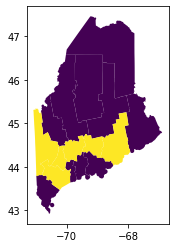

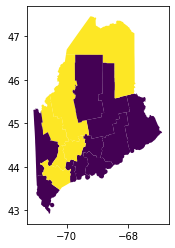

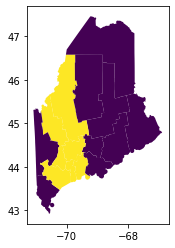

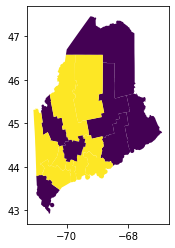

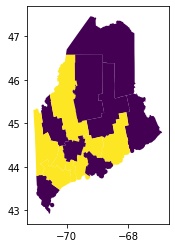

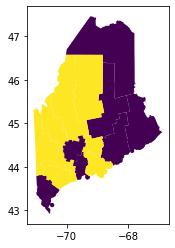

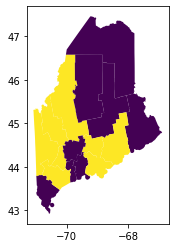

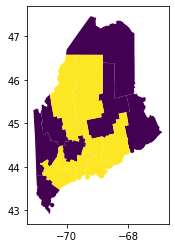

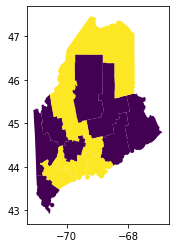

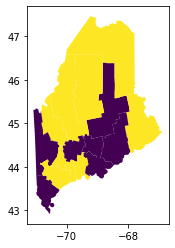

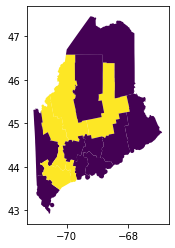

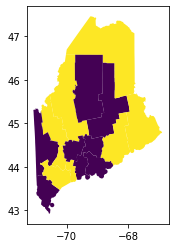

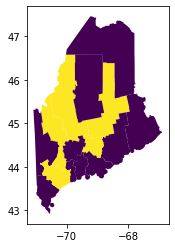

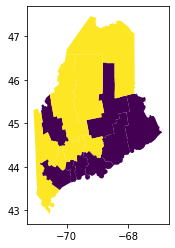

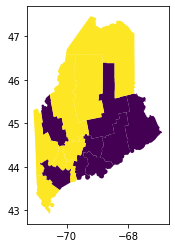

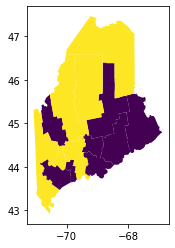

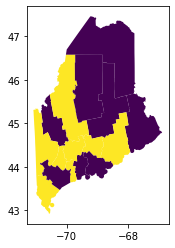

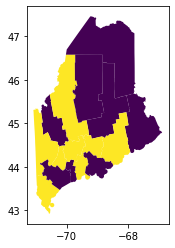

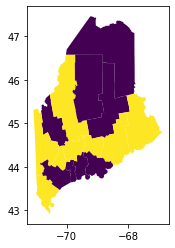

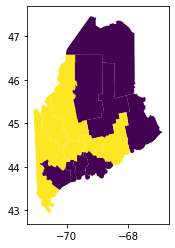

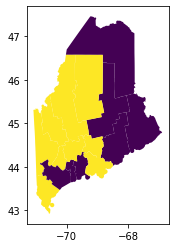

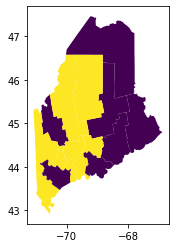

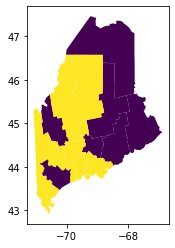

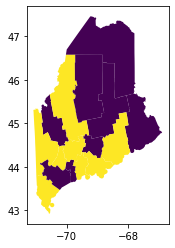

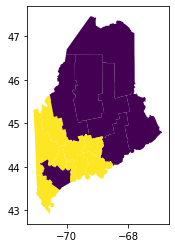

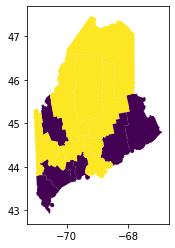

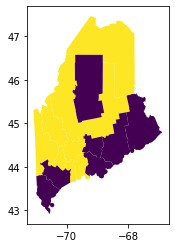

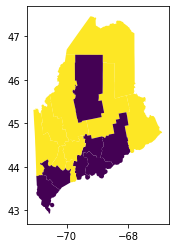

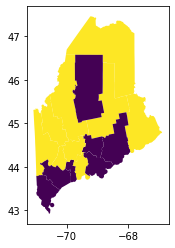

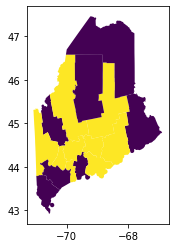

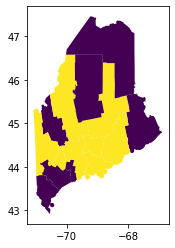

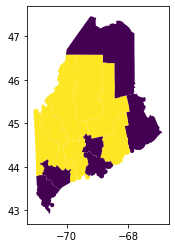

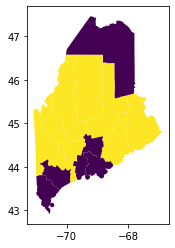

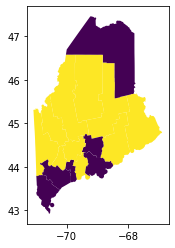

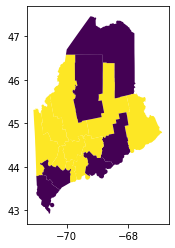

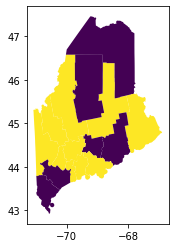

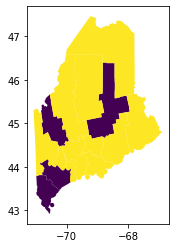

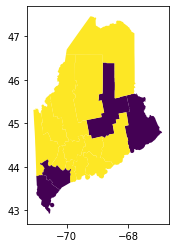

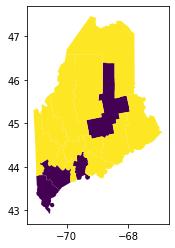

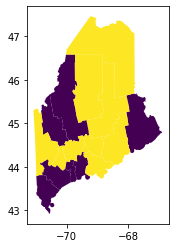

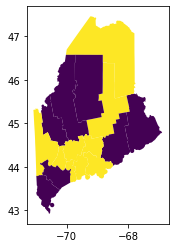

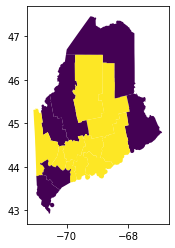

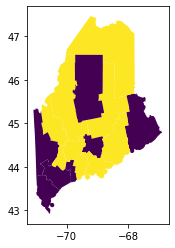

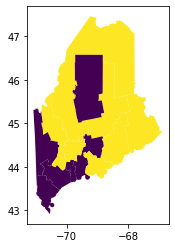

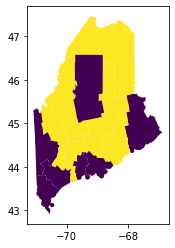

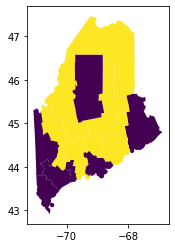

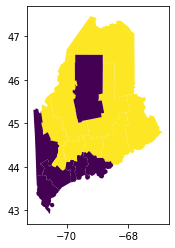

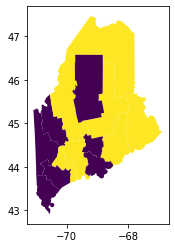

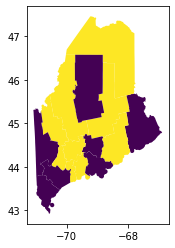

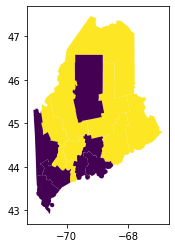

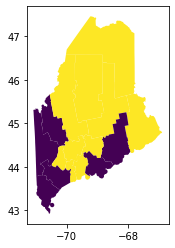

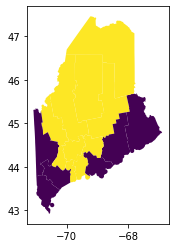

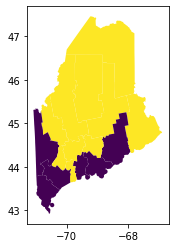

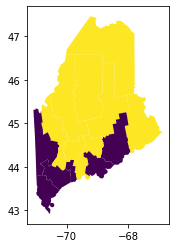

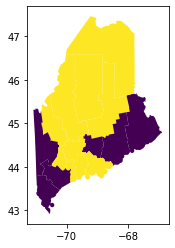

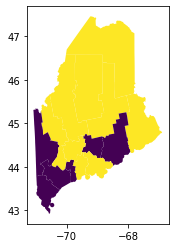

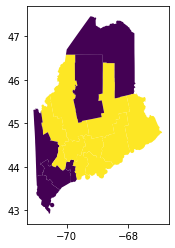

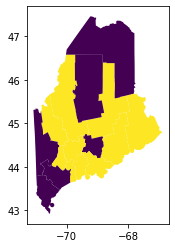

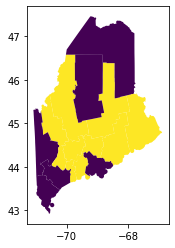

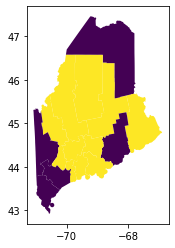

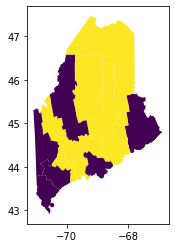

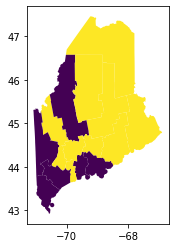

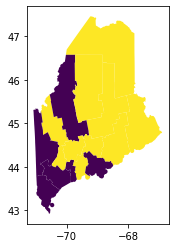

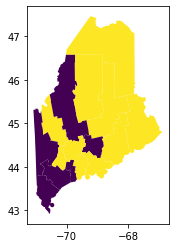

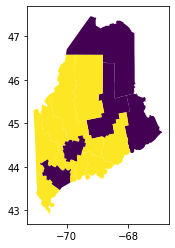

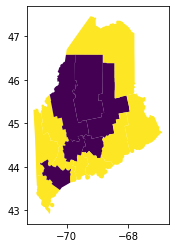

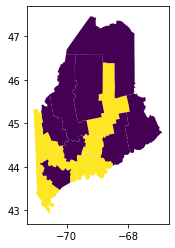

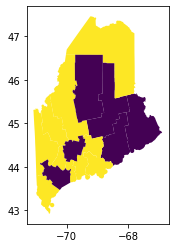

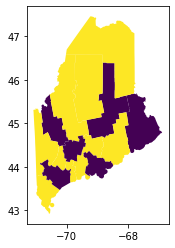

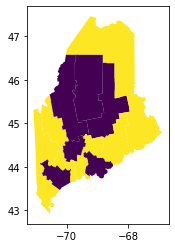

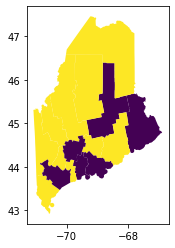

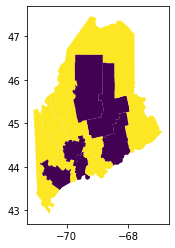

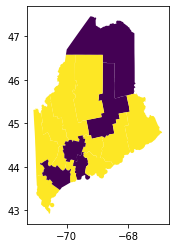

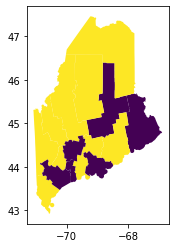

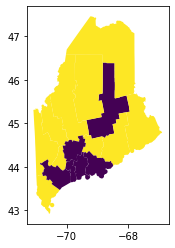

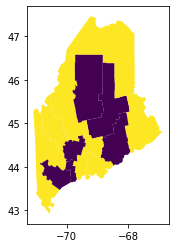

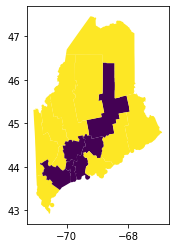

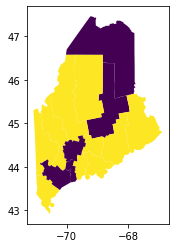

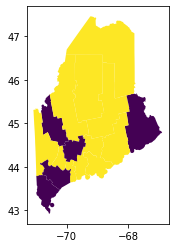

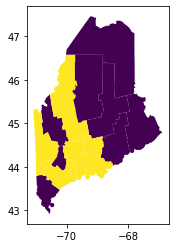

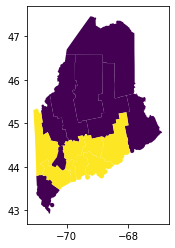

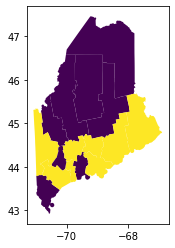

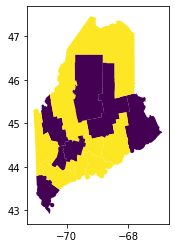

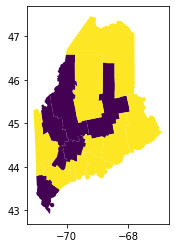

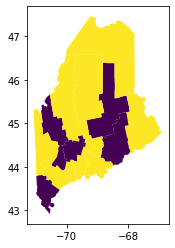

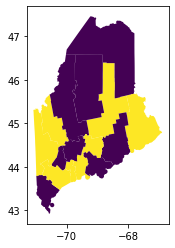

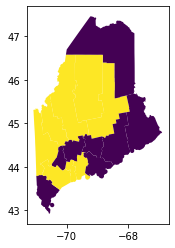

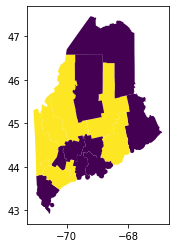

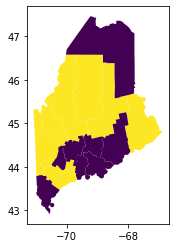

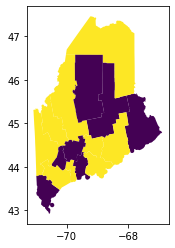

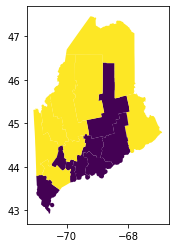

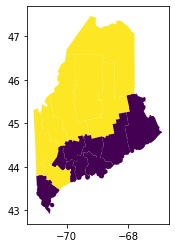

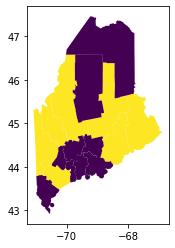

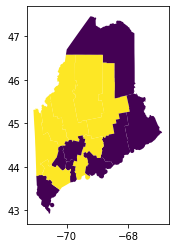

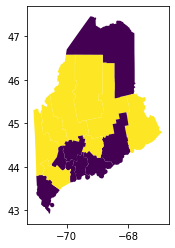

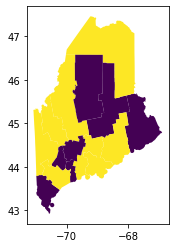

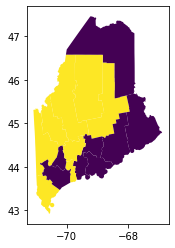

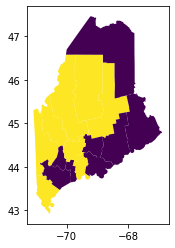

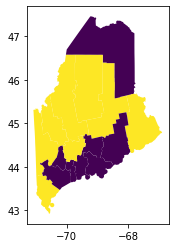

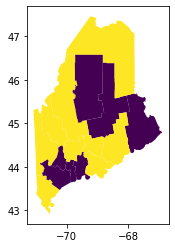

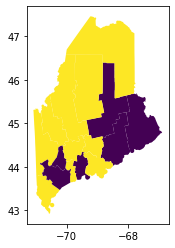

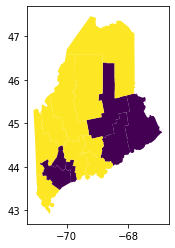

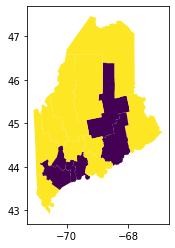

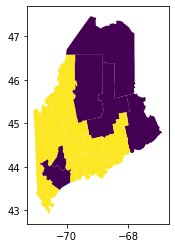

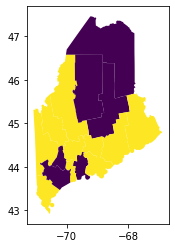

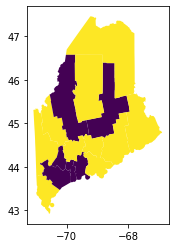

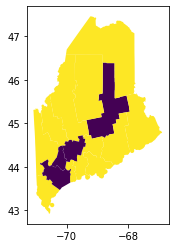

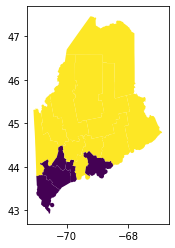

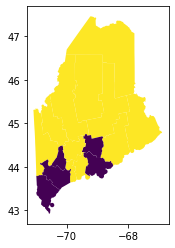

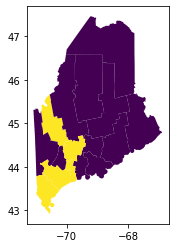

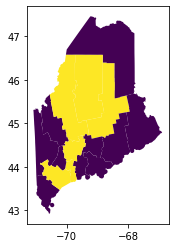

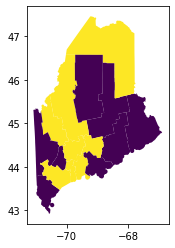

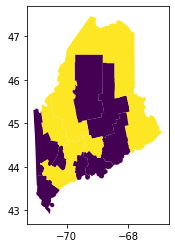

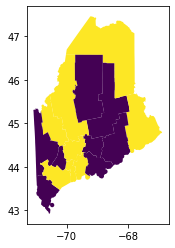

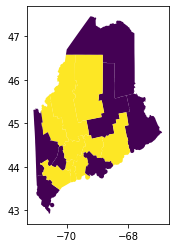

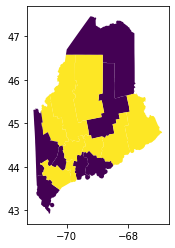

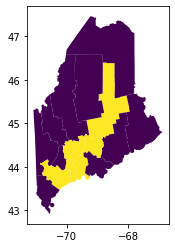

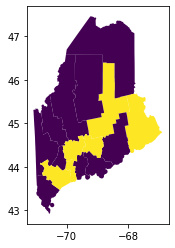

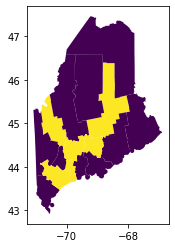

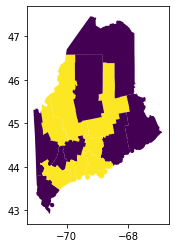

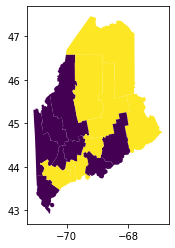

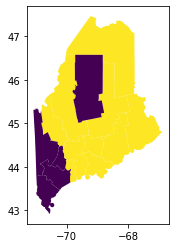

In [10]:
for district in all_districts:
    district_geoids = [ G.nodes[i]["GEOID10"] for i in district ]
    # For nodes in district, set their 'selected' values to 1. Set others to zero.
    population = sum(G.nodes[i]['TOTPOP'] for i in district)
    print("District with population",population,"is",district)
    df['selected'] = [1 if df['GEOID10'][u] in district_geoids else 0 for u in G.nodes]

    df.plot(column='selected')

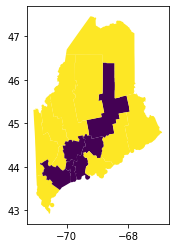

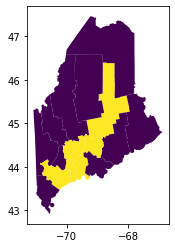

In [13]:
import networkx as nx

# Since Maine has just k=2 districts, we can just check if the district complement is feasible
for district in all_districts:
    
    complement = [ i for i in G.nodes if i not in district ]
    population = sum(G.nodes[i]['TOTPOP'] for i in complement)
    connected = nx.is_connected(G.subgraph(complement))
    
    if population >= L and population <= U and connected:
        district_geoids = [ G.nodes[i]["GEOID10"] for i in district ]
        df['selected'] = [1 if df['GEOID10'][u] in district_geoids else 0 for u in G.nodes]
        df.plot(column='selected')